In [1]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

PI = 3.1415926
e = 2.71828

In [24]:
import scipy as sc
import scipy.integrate

In [34]:
%matplotlib inline

In [51]:
import pandas as pd

In [132]:
import seaborn as sns

PlotWidth = 8

In [138]:
import sympy as sym

In [155]:
from sympy.integrals.risch import risch_integrate

In [166]:
from sympy import exp, log, pprint

In [79]:
def get_rand_number(min_value, max_value):
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice

In [80]:
def f_of_x(x):

    return (e**(-1*x))/(1+(x-1)**2)

In [81]:
def crude_monte_carlo(num_samples=5000):
    lower_bound = 0
    upper_bound = 5
    
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x)
    
    return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)

In [82]:
def get_crude_MC_variance(num_samples):

    int_max = 5 
    

    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)**2
    sum_of_sqs = running_total*int_max / num_samples
    
    
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total = f_of_x(x)
    sq_ave = (int_max*running_total/num_samples)**2
    
    return sum_of_sqs - sq_ave

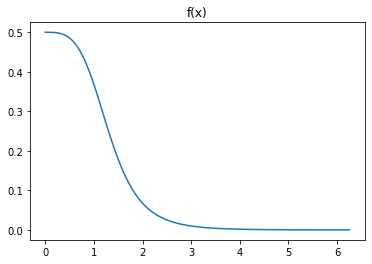

In [83]:
xs = [float(i/50) for i in range(int(50*PI*2))]
ys = [f_of_x(x) for x in xs]
plt.plot(xs,ys)
plt.title("f(x)");

In [84]:

def g_of_x(x, A, lamda):
    e = 2.71828
    return A*math.pow(e, -1*lamda*x)

def inverse_G_of_r(r, lamda):
    return (-1 * math.log(float(r)))/lamda

def get_IS_variance(lamda, num_samples):

    A = lamda
    int_max = 5
    
    # get sum of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += (f_of_x(x)/g_of_x(x, A, lamda))**2
    
    sum_of_sqs = running_total / num_samples
    
    # get squared average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)/g_of_x(x, A, lamda)
    sq_ave = (running_total/num_samples)**2
    
    
    return sum_of_sqs - sq_ave



test_lamdas = [i*0.05 for i in range(1, 61)]
variances = []

for i, lamda in enumerate(test_lamdas):
    print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
    A = lamda
    variances.append(get_IS_variance(lamda, 10000))
    clear_output(wait=True)
    
optimal_lamda = test_lamdas[np.argmin(np.asarray(variances))]
IS_variance = variances[np.argmin(np.asarray(variances))]

print(f"Optimal Lambda: {optimal_lamda}")
print(f"Optimal Variance: {IS_variance}")
print(f"Error: {(IS_variance/10000)**0.5}")

Optimal Lambda: 1.6
Optimal Variance: 0.04539364290751424
Error: 0.0021305783934770913


In [85]:
def importance_sampling_MC(lamda, num_samples):
    A = lamda
    
    running_total = 0
    for i in range(num_samples):
        r = get_rand_number(0,1)
        running_total += f_of_x(inverse_G_of_r(r, lamda=lamda))/g_of_x(inverse_G_of_r(r, lamda=lamda), A, lamda)
    approximation = float(running_total/num_samples)
    return approximation


num_samples = 10000
approx = importance_sampling_MC(optimal_lamda, num_samples)
variance = get_IS_variance(optimal_lamda, num_samples)
error = (variance/num_samples)**0.5


print(f"Importance Sampling Approximation: {approx}")
print(f"Variance: {variance}")
print(f"Error: {error}")

Importance Sampling Approximation: 0.6997093520202117
Variance: 0.03975615584196546
Error: 0.001993894577001639


In [5]:
def monte(func,a=0,b=1,n=1000):
    subsets=np.arange(0,n+1,n/10)
    steps=n/10
    u=np.zeros(n)
    for i in range(10):
        start = int(subsets[i])
        end = int(subsets[i+1])
        u[start:end]=np.random.uniform(low=i/10,high=(i+1)/10,size=end-start)
    np.random.shuffle(u)
    u_func=func(a+(b-a)*u)
    s=((b-a)/n)*u_func.sum()
    
    return s


In [6]:
def fun1(x):
    return (15*x**3+21*x**2+41*x+3)**(1/4)*(np.exp(-0.5*x))


In [194]:
integ=monte(fun1,a=0,b=4,n=1000)
print(integ)

5.757705510167884


In [25]:
scipy.integrate.quad(fun1,a=0,b=4)

(5.767433490695931, 5.492382346019772e-10)

In [28]:
m_list=[]
for i in range(1,2000):
    m_list.append(monte(fun1,a=0,b=4,n=i))

In [29]:
m_list

[3.5652103099877377,
 4.866334640387966,
 5.367036942353974,
 5.536548317990398,
 5.66619294185907,
 5.561976057250559,
 5.557046644981036,
 5.675693506255887,
 5.640261653677227,
 5.7212483064521145,
 5.558286281120306,
 5.627776724363859,
 5.638089233275875,
 5.726407968870547,
 5.774691345691151,
 5.747216919316196,
 5.6778776083686076,
 5.753208779629271,
 5.709249245695573,
 5.78197899041027,
 5.614855474617459,
 5.726558977702949,
 5.73642436201524,
 5.701071572245384,
 5.792268793406131,
 5.714084230464333,
 5.771013780355015,
 5.753682427007855,
 5.751496908358178,
 5.78615168090043,
 5.73757542273421,
 5.677708813404012,
 5.704094612691187,
 5.731678289254948,
 5.7734228789205515,
 5.720795121298461,
 5.797015392837263,
 5.7063634942892385,
 5.720527047520057,
 5.7774800019212975,
 5.697547401696287,
 5.7567665317151455,
 5.687558786667674,
 5.716745419938727,
 5.709312829836481,
 5.735950908790737,
 5.749511416506146,
 5.739583495317675,
 5.74327768908712,
 5.731780190100895,

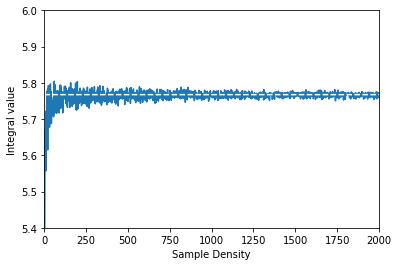

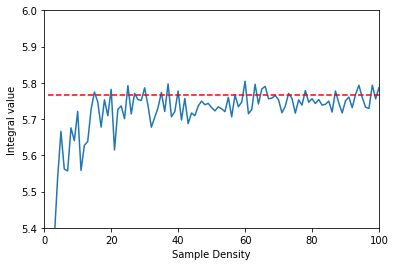

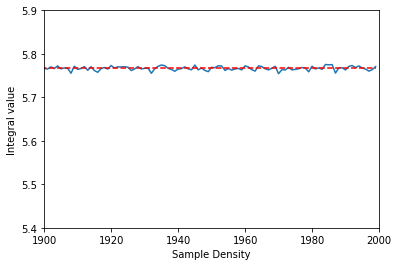

In [95]:
x=[int(s) for s in range(1,2000)]
plt.plot(x,m_list)
s_list=[scipy.integrate.quad(fun1,a=0,b=4)[0] for i in range(1,2000)]
plt.plot(x,s_list,'w--')
plt.axis([0,2000,5.4,6])
plt.ylabel("Integral value")
plt.xlabel("Sample Density")
plt.show()


plt.plot(x,m_list)
s_list=[scipy.integrate.quad(fun1,a=0,b=4)[0] for i in range(1,2000)]
plt.plot(x,s_list,'r--')
plt.axis([0,100,5.4,6])
plt.ylabel("Integral value")
plt.xlabel("Sample Density")
plt.show()

plt.plot(x,m_list)
s_list=[scipy.integrate.quad(fun1,a=0,b=4)[0] for i in range(1,2000)]
plt.plot(x,s_list,'r--')
plt.axis([1900,2000,5.4,5.9])
plt.ylabel("Integral value")
plt.xlabel("Sample Density")
plt.show()

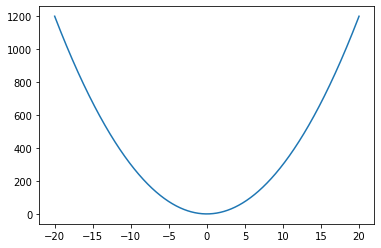

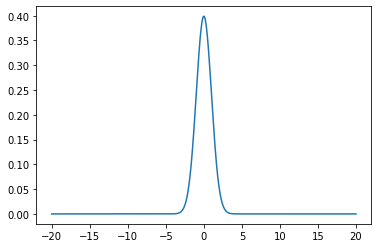

-20 20 0.0012024036048060064 1201.0
16065.040316168419
-20 20 0.0012024036048060064 1201.0
15978.088003222441
-20 20 0.0012024036048060064 1201.0


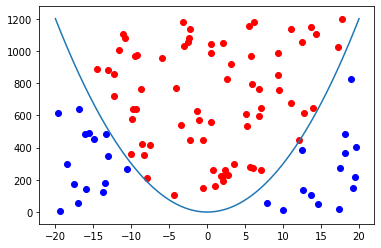

In [77]:

def easy_function(x):
    return((3)*(x**2))

def hard_function(x):
    return((1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2))

X=np.linspace(-20,20,1000)
plt.plot(X,easy_function(X))
plt.show()

plt.plot(X,hard_function(X))
plt.show()

def integrate(x1,x2,func=easy_function,n=100000):
    X=np.linspace(x1,x2,1000)
    y1=min((func(X)))
    y2=max((func(X)))+1
    print(x1,x2,y1,y2)
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1)
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or (y*func(x))<0:
            check.append(0)
        else:
            check.append(1)
    return(np.mean(check)*area,xs,ys,check)

print(integrate(-20,20)[0])
print(integrate(-20,20,easy_function)[0])
_,x,y,c=integrate(-20,20,n=100)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

X=np.linspace(-20,20,1000)
plt.plot(X,easy_function(X))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()

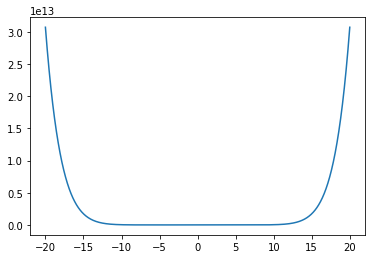

-20 20 3.1028896380426346e-17 30720000000001.0
111550464000003.62
20 20 30720000000000.0 30720000000001.0
0.0
-20 20 3.1028896380426346e-17 30720000000001.0


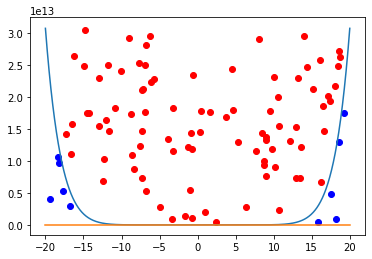

In [127]:
def easy_function(x):
    return((3)*((x**10)))

def hard_function(x):
    return((1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2))

X=np.linspace(-20,20,1000)
plt.plot(X,easy_function(X))
plt.show()



def integrate(x1,x2,func=easy_function,n=100000):
    X=np.linspace(x1,x2,1000)
    y1=min((func(X)))
    y2=max((func(X)))+1
    print(x1,x2,y1,y2)
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1)
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or (y*func(x))<0:
            check.append(0)
        else:
            check.append(1)
    return(np.mean(check)*area,xs,ys,check)

print(integrate(-20,20)[0])
print(integrate(20,20,easy_function)[0])
_,x,y,c=integrate(-20,20,n=100)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

X=np.linspace(-20,20,1000)

plt.plot(X,easy_function(X))
plt.plot(X,[0 for i in range(1000)])
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()

In [112]:
%%timeit -n1000 -r100
inte = monte(fun1,a=0,b=4,n=300)

111 µs ± 1.6 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [113]:
%%timeit -n1000 -r100
scipy.integrate.quad(fun1,a=0,b=4)

247 µs ± 12 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


In [133]:
def MonteCarloPi(numDataPoints, numCirclePoints = 360, numDecimalPoints = 4):
#Draw a square and a circle to frame out simulation
    squareX = [1,-1,-1,1,1]
    squareY = [1,1,-1,-1,1]
    
    circleX = (np.cos(np.pi*np.arange(numCirclePoints+1)/180))
    circleY = (np.sin(np.pi*np.arange(numCirclePoints+1)/180))

#Generate a bunch of values of x and y between -1 and 1, then assess their combined radius on an xy plane
    dfMonteCarloPi = pd.DataFrame(columns=['x', 'y', 'r', 'Location', 'CurrentPi'])
    dfMonteCarloPi['x'] = 2*(np.random.rand(numDataPoints)-0.5)
    dfMonteCarloPi['y'] = 2*(np.random.rand(numDataPoints)-0.5)
    dfMonteCarloPi['r'] = np.sqrt(dfMonteCarloPi['x']**2 + dfMonteCarloPi['y']**2)
    dfMonteCarloPi.loc[dfMonteCarloPi['r'] <= 1, 'Location'] = 'Inside'
    dfMonteCarloPi.loc[dfMonteCarloPi['r'] > 1, 'Location'] = 'Outside'
    dfMonteCarloPi['CurrentPi'] = 4*(dfMonteCarloPi['Location'] == 'Inside').cumsum()/(dfMonteCarloPi.index-1)
    
    piValue = np.round(np.array(dfMonteCarloPi['CurrentPi'])[-1], numDecimalPoints)
    piError = np.round(round(100*((piValue-np.pi)/np.pi),4), numDecimalPoints)

#Draw a 2D plot of where our iterations landed compared to the square and circle
    plt.figure(figsize=(PlotWidth,PlotWidth))
    plt.plot(squareX,squareY,color='#000000')
    plt.plot(circleX,circleY,color='#0000CC')
    sns.scatterplot(x='x', y='y', data=dfMonteCarloPi, hue='Location', palette='colorblind')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(bbox_to_anchor=(0,-.08), loc="upper left")
    plt.title('Locations of randomly drawn points')
    plt.show()
    
#Draw a psuedo-time series plot of current estimate of pi vs. iteration number
    plt.figure(figsize=(PlotWidth,PlotWidth))
    plt.plot(dfMonteCarloPi.index+1,dfMonteCarloPi['CurrentPi'],color='#009900')
    plt.axhline(y=np.pi,color='#0F0F0F',ls='--')
    plt.xlim(0,numDataPoints+1)
    plt.ylim(0,4)
    plt.xlabel('Iteration Number')
    plt.ylabel('Estimate for pi')
    plt.title('Current estimate for pi by iteration number')
    plt.show()

#print out our final estimate and how it compares to the true value
    print('\n' + f'Pi is approximately {piValue}\n')
    print(f'This is {piError}% off the true value.\n')
#     return dfMonteCarloPi

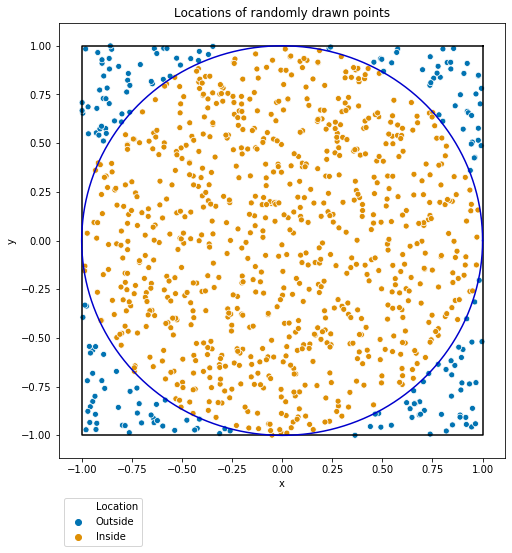

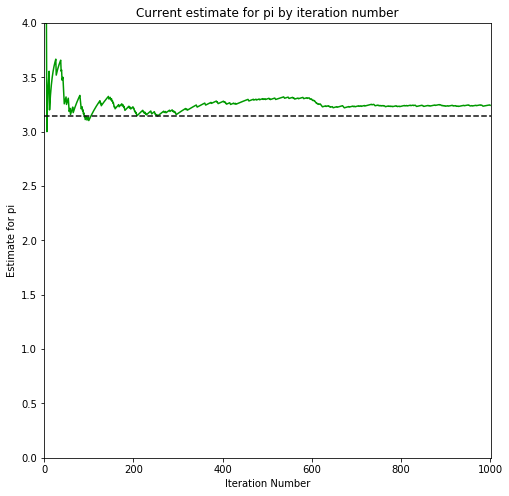


Pi is approximately 3.2425

This is 3.212% off the true value.



In [134]:
MonteCarloPi(1000)

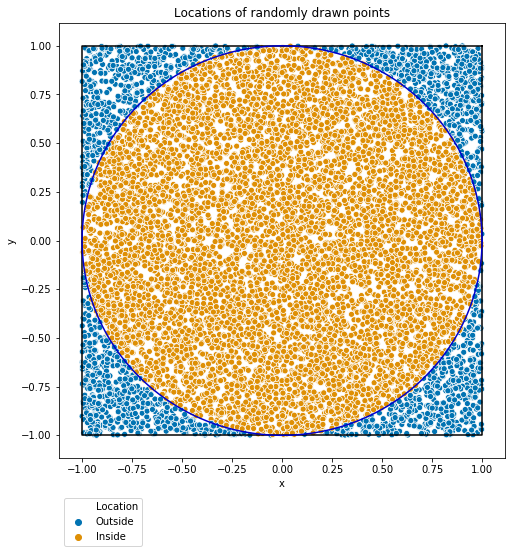

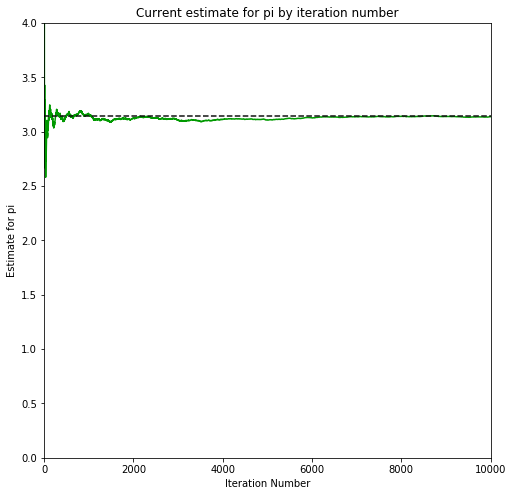


Pi is approximately 3.1374

This is -0.1335% off the true value.



In [195]:
MonteCarloPi(10000)

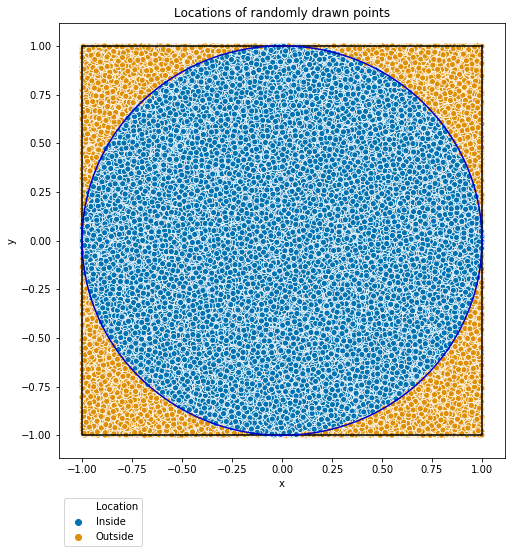

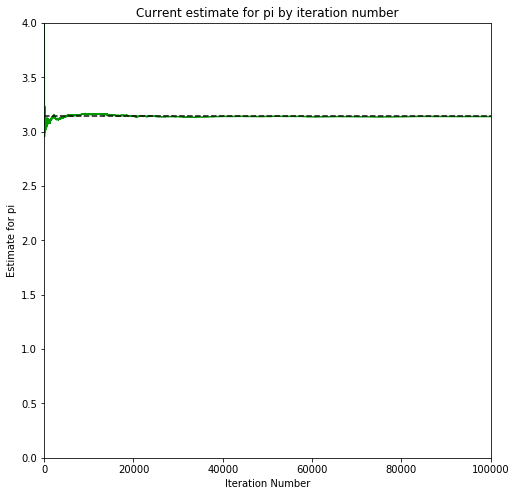


Pi is approximately 3.1383

This is -0.1048% off the true value.



In [136]:
MonteCarloPi(100000)

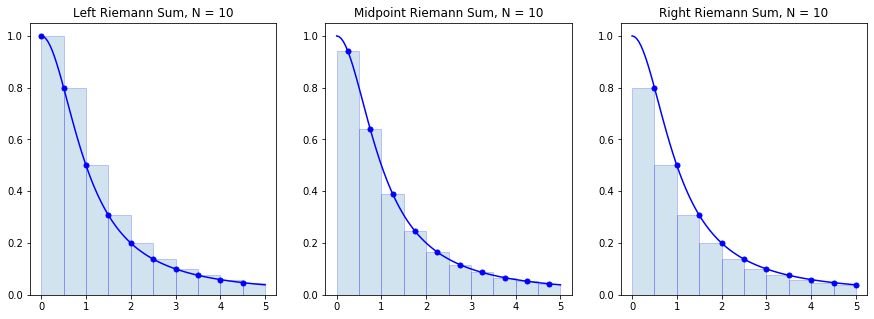

In [146]:
f = lambda x : 1/(1+x**2)
a = 0; b = 5; N = 10
n = 10 # Use n*N+1 points to plot the function smoothly

x = np.linspace(a,b,N+1)
y = f(x)

X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(X,Y,'b')
x_left = x[:-1] # Left endpoints
y_left = y[:-1]
plt.plot(x_left,y_left,'b.',markersize=10)
plt.bar(x_left,y_left,width=(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Left Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,2)
plt.plot(X,Y,'b')
x_mid = (x[:-1] + x[1:])/2 # Midpoints
y_mid = f(x_mid)
plt.plot(x_mid,y_mid,'b.',markersize=10)
plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='b')
plt.title('Midpoint Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,3)
plt.plot(X,Y,'b')
x_right = x[1:] # Left endpoints
y_right = y[1:]
plt.plot(x_right,y_right,'b.',markersize=10)
plt.bar(x_right,y_right,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Right Riemann Sum, N = {}'.format(N))

plt.show()


In [147]:
dx = (b-a)/N
x_left = np.linspace(a,b-dx,N)
x_midpoint = np.linspace(dx/2,b - dx/2,N)
x_right = np.linspace(dx,b,N)

print("Partition with",N,"subintervals.")
left_riemann_sum = np.sum(f(x_left) * dx)
print("Left Riemann Sum:",left_riemann_sum)

midpoint_riemann_sum = np.sum(f(x_midpoint) * dx)
print("Midpoint Riemann Sum:",midpoint_riemann_sum)

right_riemann_sum = np.sum(f(x_right) * dx)
print("Right Riemann Sum:",right_riemann_sum)

Partition with 10 subintervals.
Left Riemann Sum: 1.613488696614725
Midpoint Riemann Sum: 1.373543428316664
Right Riemann Sum: 1.1327194658454942


In [148]:
I = np.arctan(5)
print(I)

1.373400766945016


In [149]:
print("Left Riemann Sum Error:",np.abs(left_riemann_sum - I))
print("Midpoint Riemann Sum:",np.abs(midpoint_riemann_sum - I))
print("Right Riemann Sum:",np.abs(right_riemann_sum - I))

Left Riemann Sum Error: 0.24008792966970915
Midpoint Riemann Sum: 0.00014266137164820059
Right Riemann Sum: 0.24068130109952168


In [160]:
v = sym.Symbol('v')

In [161]:
sym.integrate(v**2+v+1,v)

v**3/3 + v**2/2 + v

In [159]:
risch_integrate(v**2+v+1,v)

v**3/3 + v**2/2 + v

In [164]:
%%time
sym.integrate(v**2+v+1,v)

Wall time: 995 µs


v**3/3 + v**2/2 + v

In [165]:
%%time
risch_integrate(v**2+v+1,v)

Wall time: 2 ms


v**3/3 + v**2/2 + v

In [169]:
%%time
risch_integrate(exp(-v**2), v)

Wall time: 20 ms


Integral(exp(-v**2), v)

In [170]:
%%time
sym.integrate(exp(-v**2), v)

Wall time: 172 ms


sqrt(pi)*erf(v)/2

In [171]:
%%time
risch_integrate((-v**2), v)

Wall time: 2.03 ms


-v**3/3

In [172]:
%%time
sym.integrate((-v**2), v)

Wall time: 966 µs


-v**3/3

In [180]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


def get_natural_cubic_spline_model(x, y, minval=None, maxval=None, n_knots=None, knots=None):

    if knots:
        spline = NaturalCubicSpline(knots=knots)
    else:
        spline = NaturalCubicSpline(max=maxval, min=minval, n_knots=n_knots)

    p = Pipeline([
        ('nat_cubic', spline),
        ('regression', LinearRegression(fit_intercept=True))
    ])

    p.fit(x, y)

    return p


class AbstractSpline(BaseEstimator, TransformerMixin):


    def __init__(self, max=None, min=None, n_knots=None, n_params=None, knots=None):
        if knots is None:
            if not n_knots:
                n_knots = self._compute_n_knots(n_params)
            knots = np.linspace(min, max, num=(n_knots + 2))[1:-1]
            max, min = np.max(knots), np.min(knots)
        self.knots = np.asarray(knots)

    @property
    def n_knots(self):
        return len(self.knots)

    def fit(self, *args, **kwargs):
        return self


class NaturalCubicSpline(AbstractSpline):

    def _compute_n_knots(self, n_params):
        return n_params

    @property
    def n_params(self):
        return self.n_knots - 1

    def transform(self, X, **transform_params):
        X_spl = self._transform_array(X)
        if isinstance(X, pd.Series):
            col_names = self._make_names(X)
            X_spl = pd.DataFrame(X_spl, columns=col_names, index=X.index)
        return X_spl

    def _make_names(self, X):
        first_name = "{}_spline_linear".format(X.name)
        rest_names = ["{}_spline_{}".format(X.name, idx)
                      for idx in range(self.n_knots - 2)]
        return [first_name] + rest_names

    def _transform_array(self, X, **transform_params):
        X = X.squeeze()
        try:
            X_spl = np.zeros((X.shape[0], self.n_knots - 1))
        except IndexError: # For arrays with only one element
            X_spl = np.zeros((1, self.n_knots - 1))
        X_spl[:, 0] = X.squeeze()

        def d(knot_idx, x):
            def ppart(t): return np.maximum(0, t)

            def cube(t): return t*t*t
            numerator = (cube(ppart(x - self.knots[knot_idx]))
                         - cube(ppart(x - self.knots[self.n_knots - 1])))
            denominator = self.knots[self.n_knots - 1] - self.knots[knot_idx]
            return numerator / denominator

        for i in range(0, self.n_knots - 2):
            X_spl[:, i+1] = (d(i, X) - d(self.n_knots - 2, X)).squeeze()
        return X_spl

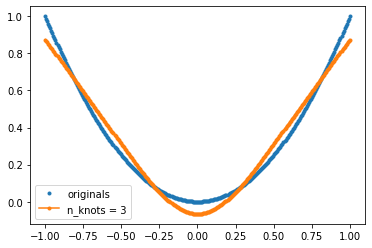

In [196]:
def func(x):
    #return 1/(1+25*x**2)
    return x**2

# make example data
x = np.linspace(-1,1,300)
y = func(x)# + np.random.normal(0, 0.2, len(x))

# The number of knots can be used to control the amount of smoothness
model_6 = get_natural_cubic_spline_model(x, y, minval=min(x), maxval=max(x), n_knots=3)
model_15 = get_natural_cubic_spline_model(x, y, minval=min(x), maxval=max(x), n_knots=15)
y_est_6 = model_6.predict(x)
y_est_15 = model_15.predict(x)


plt.plot(x, y, ls='', marker='.', label='originals')
plt.plot(x, y_est_6, marker='.', label='n_knots = 3')
#plt.plot(x, y_est_15, marker='.', label='n_knots = 15')
plt.legend(); plt.show()

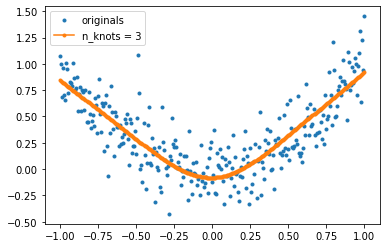

In [197]:
x = np.linspace(-1,1,300)
y = func(x) + np.random.normal(0, 0.2, len(x))

# The number of knots can be used to control the amount of smoothness
model_6 = get_natural_cubic_spline_model(x, y, minval=min(x), maxval=max(x), n_knots=3)
model_15 = get_natural_cubic_spline_model(x, y, minval=min(x), maxval=max(x), n_knots=15)
y_est_6 = model_6.predict(x)
y_est_15 = model_15.predict(x)


plt.plot(x, y, ls='', marker='.', label='originals')
plt.plot(x, y_est_6, marker='.', label='n_knots = 3')
#plt.plot(x, y_est_15, marker='.', label='n_knots = 15')
plt.legend(); plt.show()